# Klasifikasi Kualitas Buah Pisang
- **Nama:** Lusi Aulia Jati
- **Email:** lusiauliajati@gmail.com
- **Sumber Data:** https://www.kaggle.com/datasets/l3llff/banana

##  Load Data

In [1]:
#mengimpor library yang diperlukan
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [2]:
# Clone dataset dari github
!git clone https://github.com/lusiaulia/banana_quality.git
# mendefinisikan dataframe
bnn = pd.read_csv("./banana_quality.csv")
bnn.head()

fatal: destination path 'banana_quality' already exists and is not an empty directory.


,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good


Terlihat tampilan dari data, terdapat 7 data berbentuk kuantitatif dan 1 data kualitatif. Akan dilihat berapa banyak variasi data kualitatif pada data Quality.

In [3]:
jumlah_jenis = bnn["Quality"].nunique()
print(f"Jumlah jenis data kualitatif: {jumlah_jenis}")
jenis_data = bnn["Quality"].value_counts()
print(jenis_data)

Jumlah jenis data kualitatif: 2
Good    4006
Bad     3994
Name: Quality, dtype: int64


Terdapat 2 jenis data kualitatif (Bad dan Good). Sehingga akan didefinisikan Good = 1 dan Bad = 0.

In [4]:
bnn["Quality"] = bnn["Quality"].replace({"Bad": 0, "Good": 1})
bnn.head()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,1
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,1
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,1
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,1
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,1


In [5]:
#melihat informasi jumlah dan jenis data 
bnn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         8000 non-null   float64
 1   Weight       8000 non-null   float64
 2   Sweetness    8000 non-null   float64
 3   Softness     8000 non-null   float64
 4   HarvestTime  8000 non-null   float64
 5   Ripeness     8000 non-null   float64
 6   Acidity      8000 non-null   float64
 7   Quality      8000 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 500.1 KB


Total terdapat 8000 data, dengan 7 data bertipe float dan 1 jenis data integer (biner 1 dan 0).

In [6]:
#melihat statistik deskriptif dari data
bnn.describe()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,-0.747802,-0.761019,-0.770224,-0.014441,-0.751288,0.781098,0.008725,0.500750
std,2.136023,2.015934,1.948455,2.065216,1.996661,2.114289,2.293467,0.500031
min,-7.998074,-8.283002,-6.434022,-6.959320,-7.570008,-7.423155,-8.226977,0.000000
25%,-2.277651,-2.223574,-2.107329,-1.590458,-2.120659,-0.574226,-1.629450,0.000000
50%,-0.897514,-0.868659,-1.020673,0.202644,-0.934192,0.964952,0.098735,1.000000
75%,0.654216,0.775491,0.311048,1.547120,0.507326,2.261650,1.682063,1.000000
max,7.970800,5.679692,7.539374,8.241555,6.293280,7.249034,7.411633,1.000000


Ketujuh data memiliki rentang berkisar -8 hingga 8, sebelum digunakan untuk proses prediksi akan dilebih sempitkan lagi interval range datanya menjadi -1 hingga 1 agar lebih algoritma bisa bekerja lebih maksimal

## Exploratory Data Analysis
### Data Cleaning

In [7]:
#mengecek apakah ada data kosong
bnn.isnull().sum()

Size           0
Weight         0
Sweetness      0
Softness       0
HarvestTime    0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

<Axes: >

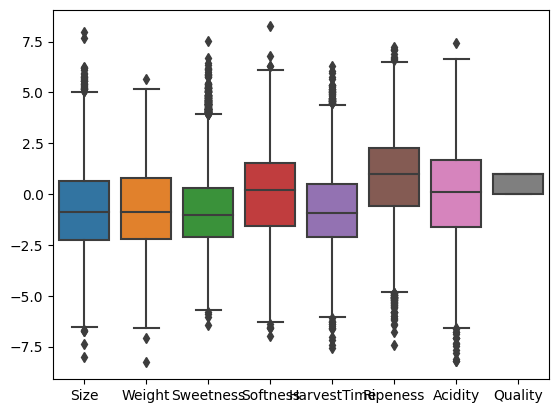

In [8]:
#outlier dari data
sns.boxplot(bnn)

Masih terdapat cukup banyak data outlier sehingga perlu dilakukan penghapusan outlier supaya tidak mempengaruhi hasil prediksi

In [9]:
Q1 = bnn.quantile(0.25)
Q3 = bnn.quantile(0.75)
IQR=Q3-Q1
bnn=bnn[~((bnn<(Q1-1.5*IQR))|(bnn>(Q3+1.5*IQR))).any(axis=1)]
 
# Cek ukuran dataset setelah drop outliers
bnn.shape

(7645, 8)

Setelah dihapus outlier diperoleh sebanyak 7645 data yang tersisa, coba dilihat secara visualisasi boxplotnya kembali

<Axes: >

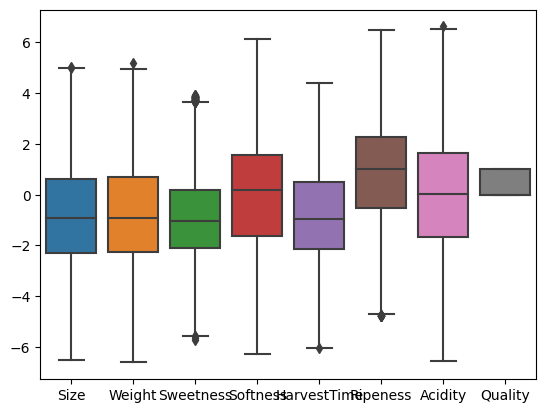

In [10]:
sns.boxplot(bnn)

terlihat sudah cukup bersih dari outlier

In [11]:
bnn["Quality"].value_counts()

0    3919
1    3726
Name: Quality, dtype: int64

Jumlah perbandingan sampel data kategori 'Bad' dan 'Good' memiliki jumlah yang hampir seimbang 3919 dan 3726 sehingga dipenelitian ini tidak dilakukan perubahan lagi untuk jumlah sampel.

### Feature Selection

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

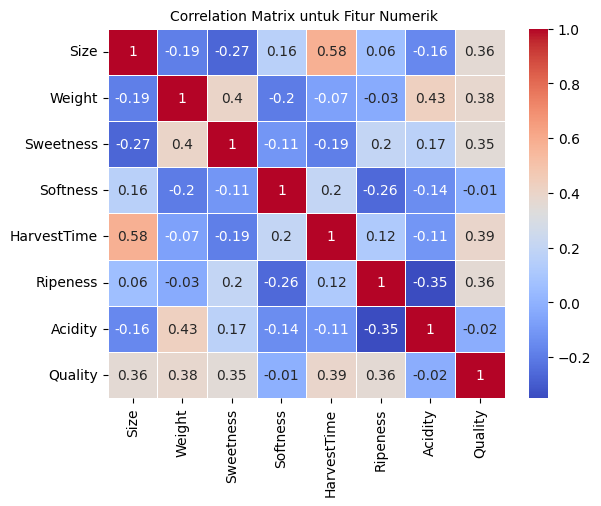

In [12]:
plt.figure()
correlation_matrix = bnn.corr().round(2)
 
# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix untuk Fitur Numerik ", size=10)

Secara korelasi data karakteristik buah memiliki korelasi yang kecil sekali terhadap kualitas buah pisang, seperti tingkat keasaman dan tekstur buah yang memiliki korelasi sebesar -0,02 dan -0,01. Namun untuk karakteristik lainnya menunjukkan korelasi positif yang cukup baik hampir diangka 0,4. Sehingga untuk data input akan digunakan karakteristik yang menunjukkan korelasi positif (Ukuran, Berat, Kemanisan, Waktu Panen, dan Kematangan Buah).  

Menggunakan model K-Nearest Neighbor (KNN), Logistic Regression, dan XGBoost. Akan digunakan data train 80% dan test 20%.

### Data Transforms

In [13]:
X = bnn.drop(['Quality','Acidity','Softness'], 1)
y = bnn['Quality']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 123)

C:\Users\lusia\AppData\Local\Temp\ipykernel_7488\1139893819.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = bnn.drop(['Quality','Acidity','Softness'], 1)


In [14]:
print(f'Total # of sample in whole dataset: {len(X_scaled)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 7645
Total # of sample in train dataset: 6116
Total # of sample in test dataset: 1529


## Modeling & Evaluate Model
### KNN Model

In [15]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [16]:
# membuat fungsi evaluasi model
def evaluasi_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

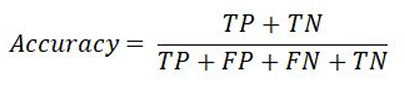

Evaluasi yang digunakan pada penelitian ini yaitu menggunakan skor akurasi, yang mengukur nilai akurasi yang didapatkan dari jumlah data bernilai positif yang diprediksi positif dan data bernilai negatif yang diprediksi negatif dibagi dengan jumlah seluruh data di dalam dataset.

In [17]:
evaluasi_model(knn, X_test, y_test)

0.9182472204054938

Dihasilkan akurasi sebesar 91,8% pada model KNN pada data test.

### Logistic Regression

In [18]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

In [19]:
evaluasi_model(LR, X_test, y_test)

0.8724656638325703

Dihasilkan akurasi sebesar 87,2% pada model regresi logistik pada data test.

### XG Boost

In [20]:
# !pip install xgboost

XGB = XGBClassifier()
XGB.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [21]:
evaluasi_model(XGB, X_test, y_test)

0.9215173315892741

Dihasilkan akurasi sebesar 92,1% pada model XGBoost pada data test.

## Conclusion

Dari ketiga model terlihat model dengan akurasi yang paling besar yaitu model XGBoost dan KNN dengan akurasi berkisar 92%. Mengindikasikan bahwa model sudah bisa mengklasifikasikan data karakteristik buah pisang apakah berkualitas baik atau tidak dengan baik. Namun untuk penelitian selanjutnya akan lebih baik jika digunakan evaluasi lainnya seperti precision, recall, F1-score, atau AUC-ROC dan pengecekan apakah model overfit atau tidak supaya jika digunakan data baru model dapat memprediksi dengan baik.